# Instruções

Considerando o conjunto de dados hospital apresentado na primeira aula (ver arquivo em anexo):

    1- Calcular, para cada coluna desse conjunto de dados, as estatísticas univariadas pertinentes dentre frequências, moda, média, mediana, desvio-padrão, Q1, Q3, obliquidade e curtose.
    2- Calcular estatísticas multivariadas de covariância e correção para os atributos quantitativos presentes.
    3- Plotar boxplots dos atributos pertinentes e identificar a presença ou não de outliers.
    4- Plotar histogramas dos atributos e interpretar sua distribuição, considerando as classes.
Recomenda-se o uso da linguagem Python e das biblioteca pandas, numpy e matplotlib para realização dos exercícios, mas não é obrigatório.

### 1. Carregamento dos dados

In [2]:
import pandas as pd

# Carregar o arquivo Excel
df = pd.read_excel("hospital.xlsx")

# Exibir as primeiras linhas
df.head()


,ID,NOME,IDADE,SEXO,PESO,MANCHAS,TEMP.,#INT.,EST.,DIAGNÓSTICO
0,4201,João,28,M,79,Concentradas,38.0,2,SP,Doente
1,3217,Maria,18,F,67,Inexistentes,39.5,4,MG,Doente
2,4039,Luiz,49,M,92,Espalhadas,38.0,2,RS,Saudável
3,1920,José,18,M,43,Inexistentes,38.5,8,MG,Doente
4,4340,Cláudia,21,F,52,Uniformes,37.6,1,PE,Saudável


### 📊 2. Estatísticas Univariadas

In [3]:
import numpy as np
from scipy.stats import skew, kurtosis, mode

# Selecionar colunas quantitativas
quant_cols = ["IDADE", "PESO", "TEMP.", "#INT."]

# Função de estatísticas
def estatisticas_univariadas(df, col):
    data = df[col]
    return {
        "Moda": mode(data, keepdims=False).mode,
        "Média": data.mean(),
        "Mediana": data.median(),
        "Desvio-padrão": data.std(),
        "Q1": data.quantile(0.25),
        "Q3": data.quantile(0.75),
        "Skewness": skew(data),
        "Curtose": kurtosis(data),
        "Frequência": data.value_counts().to_dict()
    }

# Aplicar estatísticas
estatisticas = {col: estatisticas_univariadas(df, col) for col in quant_cols}
pd.DataFrame(estatisticas)


,IDADE,PESO,TEMP.,#INT.
Moda,18,67,38.0,2
Média,26.125,69.875,38.375,3.5
Mediana,21.5,69.5,38.2,2.5
Desvio-padrão,10.78938,16.599806,0.620484,2.390457
Q1,18.75,63.25,38.0,2.0
Q3,29.5,81.0,38.625,4.5
Skewness,1.316293,-0.285388,0.668871,0.905608
Curtose,0.493116,-0.943366,-0.604617,-0.4825
Frequência,"{18: 2, 28: 1, 49: 1, 21: 1, 22: 1, 19: 1, 34: 1}","{67: 2, 79: 1, 92: 1, 43: 1, 52: 1, 72: 1, 87: 1}","{38.0: 3, 39.5: 1, 38.5: 1, 37.6: 1, 39.0: 1, ...","{2: 3, 4: 1, 8: 1, 1: 1, 3: 1, 6: 1}"


### 🔗 3. Estatísticas Multivariadas (Covariância e Correlação)

In [4]:
# Covariância
covariancia = df[quant_cols].cov()
print("Covariância:")
display(covariancia)

# Correlação
correlacao = df[quant_cols].corr()
print("Correlação:")
display(correlacao)


Covariância:


,IDADE,PESO,TEMP.,#INT.
IDADE,116.410714,100.446429,-2.596429,-13.214286
PESO,100.446429,275.553571,0.767857,-11.214286
TEMP.,-2.596429,0.767857,0.385000,0.842857
#INT.,-13.214286,-11.214286,0.842857,5.714286


Correlação:


,IDADE,PESO,TEMP.,#INT.
IDADE,1.000000,0.560835,-0.387837,-0.512349
PESO,0.560835,1.000000,0.074550,-0.282610
TEMP.,-0.387837,0.074550,1.000000,0.568254
#INT.,-0.512349,-0.282610,0.568254,1.000000


### 📦 4. Boxplots para identificar outliers

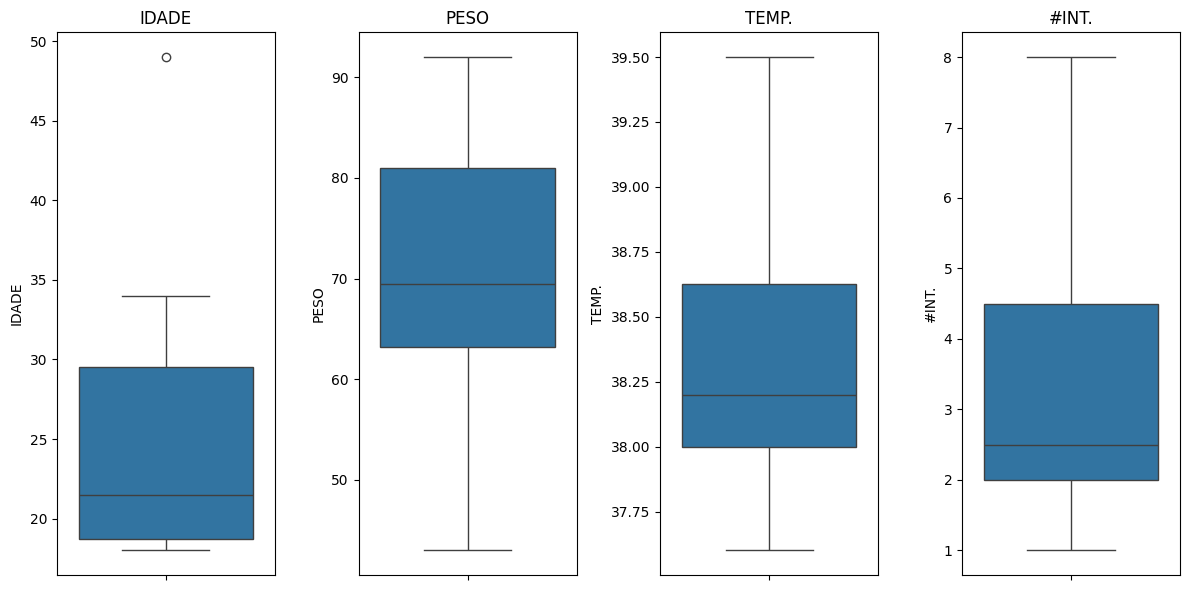

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, col in enumerate(quant_cols):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### 📈 5. Histogramas por Diagnóstico

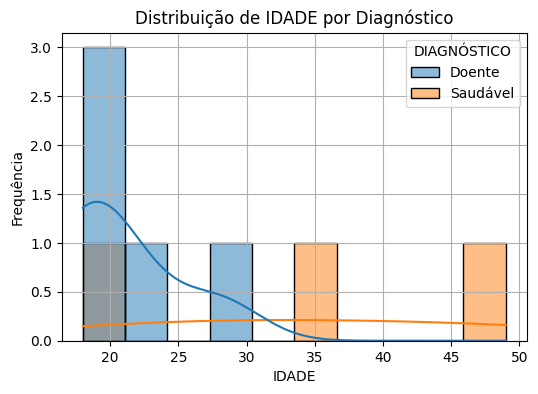

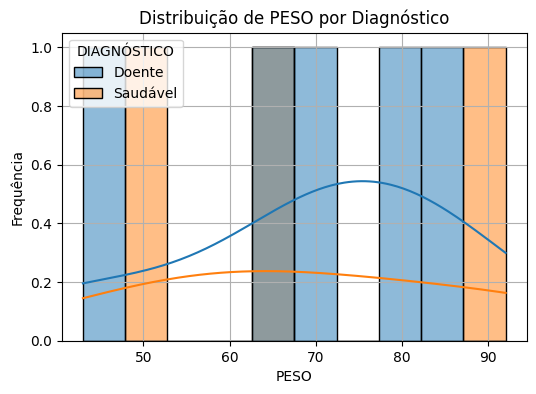

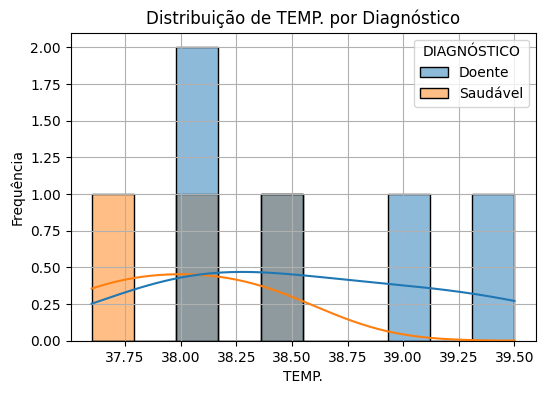

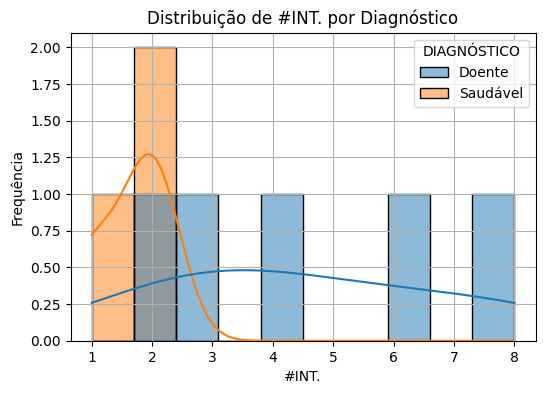

In [6]:
for col in quant_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue="DIAGNÓSTICO", kde=True, bins=10)
    plt.title(f"Distribuição de {col} por Diagnóstico")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.grid(True)
    plt.show()
